In [7]:
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

In [3]:
df=pd.read_csv('Mall_Customers.csv')

In [4]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
X=df.iloc[:, [3,4]]

In [6]:
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [11]:
km=KMeans(n_clusters=5)
y_pred=km.fit_predict(X)

In [12]:
df['Cluster']=y_pred

In [13]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


In [14]:
df['Cluster'].unique()

array([4, 3, 1, 2, 0])

In [18]:
df1=df[df['Cluster']==4]
df2=df[df['Cluster']==3]
df3=df[df['Cluster']==2]
df4=df[df['Cluster']==1]
df5=df[df['Cluster']==0]

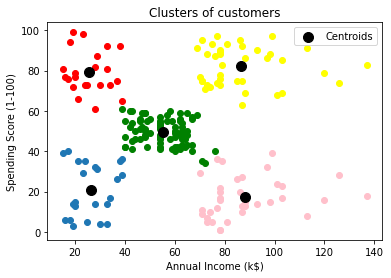

In [31]:
plt.scatter(df1['Annual Income (k$)'], df1['Spending Score (1-100)'])
plt.scatter(df2['Annual Income (k$)'], df2['Spending Score (1-100)'], color='red')
plt.scatter(df3['Annual Income (k$)'], df3['Spending Score (1-100)'], color='yellow')
plt.scatter(df4['Annual Income (k$)'], df4['Spending Score (1-100)'], color='green')
plt.scatter(df5['Annual Income (k$)'], df5['Spending Score (1-100)'], color='pink')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()

### Preprocessing using MinMax

In [34]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
scalar.fit(X)
X=scalar.fit_transform(X)

In [35]:
X

array([[0.        , 0.3877551 ],
       [0.        , 0.81632653],
       [0.00819672, 0.05102041],
       [0.00819672, 0.7755102 ],
       [0.01639344, 0.39795918],
       [0.01639344, 0.76530612],
       [0.02459016, 0.05102041],
       [0.02459016, 0.94897959],
       [0.03278689, 0.02040816],
       [0.03278689, 0.7244898 ],
       [0.03278689, 0.13265306],
       [0.03278689, 1.        ],
       [0.04098361, 0.14285714],
       [0.04098361, 0.7755102 ],
       [0.04098361, 0.12244898],
       [0.04098361, 0.79591837],
       [0.04918033, 0.34693878],
       [0.04918033, 0.66326531],
       [0.06557377, 0.28571429],
       [0.06557377, 0.98979592],
       [0.07377049, 0.34693878],
       [0.07377049, 0.73469388],
       [0.08196721, 0.04081633],
       [0.08196721, 0.73469388],
       [0.10655738, 0.13265306],
       [0.10655738, 0.82653061],
       [0.10655738, 0.31632653],
       [0.10655738, 0.6122449 ],
       [0.1147541 , 0.30612245],
       [0.1147541 , 0.87755102],
       [0.

In [37]:
km=KMeans(n_clusters=5)
y_pred=km.fit_predict(X)

In [38]:
df1=df[df['Cluster']==4]
df2=df[df['Cluster']==3]
df3=df[df['Cluster']==2]
df4=df[df['Cluster']==1]
df5=df[df['Cluster']==0]

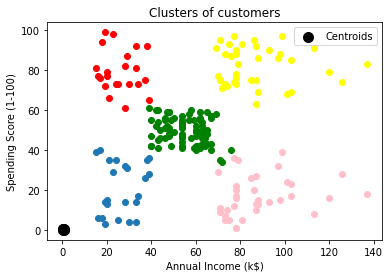

In [39]:
plt.scatter(df1['Annual Income (k$)'], df1['Spending Score (1-100)'])
plt.scatter(df2['Annual Income (k$)'], df2['Spending Score (1-100)'], color='red')
plt.scatter(df3['Annual Income (k$)'], df3['Spending Score (1-100)'], color='yellow')
plt.scatter(df4['Annual Income (k$)'], df4['Spending Score (1-100)'], color='green')
plt.scatter(df5['Annual Income (k$)'], df5['Spending Score (1-100)'], color='pink')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()

### Expriement Failed

### Elbow Method to find the optimal number of  Clustering

In [40]:
wsse=[]

for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wsse.append(km.inertia_)
    

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


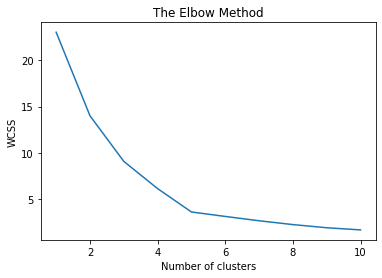

In [42]:
plt.plot(range(1,11), wsse)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()